In [91]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [92]:
# fix random seed for reproducibility
seed = 17
numpy.random.seed(seed)

In [93]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [94]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [95]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [96]:
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [97]:
# define the baseline model
def baseline_model():
   # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
   # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return model

In [98]:
# building the model
model = baseline_model()
# Fitting the model
info = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, verbose=2)
# Evaluating the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.2012 - acc: 0.9427 - val_loss: 0.1161 - val_acc: 0.9646
Epoch 2/10
 - 15s - loss: 0.0955 - acc: 0.9732 - val_loss: 0.0897 - val_acc: 0.9721
Epoch 3/10
 - 15s - loss: 0.0709 - acc: 0.9806 - val_loss: 0.0798 - val_acc: 0.9756
Epoch 4/10
 - 15s - loss: 0.0568 - acc: 0.9853 - val_loss: 0.0734 - val_acc: 0.9777
Epoch 5/10
 - 15s - loss: 0.0479 - acc: 0.9878 - val_loss: 0.0676 - val_acc: 0.9791
Epoch 6/10
 - 15s - loss: 0.0407 - acc: 0.9897 - val_loss: 0.0644 - val_acc: 0.9804
Epoch 7/10
 - 15s - loss: 0.0356 - acc: 0.9912 - val_loss: 0.0625 - val_acc: 0.9811
Epoch 8/10
 - 17s - loss: 0.0314 - acc: 0.9927 - val_loss: 0.0607 - val_acc: 0.9815
Epoch 9/10
 - 15s - loss: 0.0277 - acc: 0.9941 - val_loss: 0.0598 - val_acc: 0.9817
Epoch 10/10
 - 15s - loss: 0.0249 - acc: 0.9951 - val_loss: 0.0585 - val_acc: 0.9830
Testing Accuracy: 98.30%


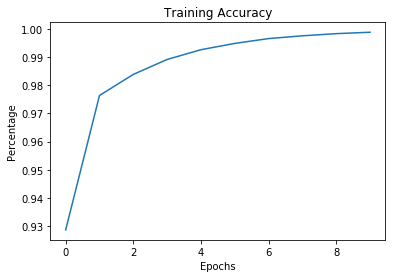

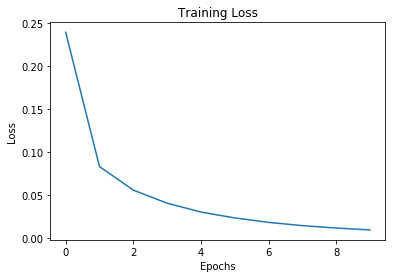

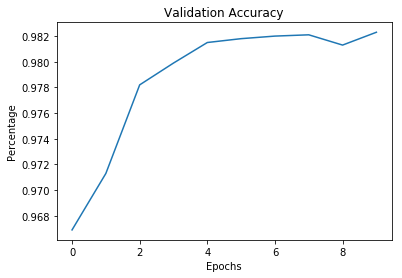

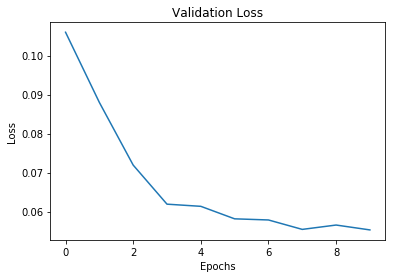

In [54]:
#Plot training accuracy vs. epochs
epochs = range(10)
plt.figure(1) 
plt.plot(epochs,info.history['acc'],label='acc')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.title('Training Accuracy')

#Plot training accuracy vs. epochs 
plt.figure(2) 
plt.plot(epochs,info.history['loss'],label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

#Plot validation accuracy vs. epochs
plt.figure(3)
plt.plot(epochs,info.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.title('Validation Accuracy')
 
#Plot validation loss vs. epochs
plt.figure(4)
plt.plot(epochs,info.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')


plt.show()